In [2]:
import pandas as pd
import matplotlib.pyplot as plot

In [9]:
data = pd.read_csv('backtest_data.csv')

Trade 1, Gain/Loss: -90.37656903765674
Trade 3, Gain/Loss: -91.50588444760979
Trade 5, Gain/Loss: 105.55446532221322
Trade 7, Gain/Loss: -93.88370202069746
Trade 13, Gain/Loss: -91.92672400846641
Trade 17, Gain/Loss: 101.67247608489015
Trade 19, Gain/Loss: 98.96083108225321
Trade 21, Gain/Loss: -96.31118762264305
Trade 23, Gain/Loss: 98.91891703864167
Trade 25, Gain/Loss: 104.75320753967935
Trade 27, Gain/Loss: -96.49509469417353
Trade 29, Gain/Loss: 104.22201641465472
Trade 31, Gain/Loss: -91.64033693491729
Trade 33, Gain/Loss: 108.21045705526558
Trade 37, Gain/Loss: -100.44787247409295
Trade 39, Gain/Loss: -98.2164007356514
Trade 41, Gain/Loss: 102.37947572058147
Trade 43, Gain/Loss: -97.11972194870032
Trade 45, Gain/Loss: 101.52806536094431
Trade 47, Gain/Loss: -91.04046761763493
Trade 49, Gain/Loss: -98.20430301765555
Trade 51, Gain/Loss: 103.219023213951
Trade 53, Gain/Loss: -89.16484447695257
Trade 55, Gain/Loss: 98.9990642654484
Trade 57, Gain/Loss: 100.52116479305005
Trade 59, 

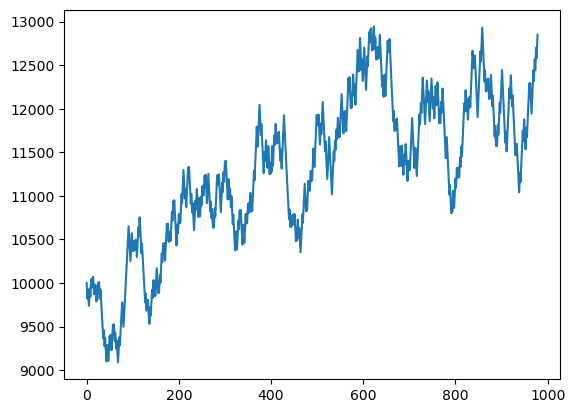

In [21]:
balance = 10000
balance_points = [10000]

for index, row in data.iterrows():
    stake = balance / 100

    if row['call_buy'] == True:
        buy_price = row['call_prices']
        sell_price = data.at[(index+1, 'call_prices')]
        p_l = sell_price - buy_price

        if p_l > 0:
            g_l = (p_l/buy_price + 1) * stake
            new_balance = balance + g_l
        elif p_l < 0:
            g_l = (p_l/buy_price + 1) * stake
            new_balance = balance - g_l
        else:
            continue

    
    elif row['put_buy'] == True:
        buy_price = row['put_prices']
        sell_price = data.at[(index+1, 'put_prices')]
        p_l = sell_price - buy_price

        if p_l > 0:
            g_l = (p_l/buy_price + 1) * stake
            new_balance = balance + g_l
        elif p_l < 0:
            g_l = (p_l/buy_price + 1) * stake
            new_balance = balance - g_l
        else:
            continue
        
    else:
        continue
    
    print(f'Trade {index+1}, Gain/Loss: {new_balance - balance}')
    balance = new_balance
    balance_points.append(balance)

plot.plot(balance_points)
percent_gain = round(((balance - 10000) / 10000) * 100, 2)
print(f'Gain: {percent_gain}%\nMax: {max(balance_points)}\nMin: {min(balance_points)}')